# House Price Prediction with House Sales in King County

## Introduction
Many factors will influence House price. Therefore, house price is hard to predict. To solve this problem, I will use various ways to analyze the House Sales data in King County from May 2014 to May 2015. The different situation of the house will cause the different sale prize. I think the regression is an excellent way to build the model to predict the price of the house. In this project, I will use statistical methods to find the trend from the dataset; then I will use the different way to create the model to predict the house price.

## Data Source and Description
The dataset is from the Kaggle(https://www.kaggle.com/harlfoxem/housesalesprediction). It's about the house sales data in King County from May 2014 to May 2015.This dataset include the price and severals factors of the House. There is the data description.
* id: A notation for a house
* date: Date house was sold
* price: Price is prediction target
* bedrooms: Number of Bedrooms/House
* bathrooms: Number of bathrooms/bedrooms
* sqft_living: Square footage of the home
* sqft_lot: Square footage of the lot
* floors: Total floors (levels) in house
* waterfront: House which has a view to a waterfront
* view: Has been viewed
* condition: How good the condition is ( Overall )
* grade: Overall grade given to the housing unit, based on King County grading system
* sqft_above: Square footage of house apart from basement
* sqft_basement: Square footage of the basement
* yr_built: Built Year
* yr_renovated: Year when house was renovated
* zipcode: zip
* lat: Latitude coordinate
* long: Longitude coordinate
* sqft_living15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
* sqft_lot15: lotSize area in 2015(implies-- some renovations)


## Questions to answer
* Q1: Which factor has a significant influence on house price?
* Q2: Could we use this factor to predict the house price?
* Q3: What's the situation of the house in King Country?

## Setting up the environment

In [55]:
# import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import row
from bokeh.io import output_notebook
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model
import warnings

## Data extraction
I downloaded the data from Kaggle Open data and uploaded to the dropbox. According to the link, we can directly download the original dataset.

In [56]:
# data extraction
house = pd.read_csv('https://www.dropbox.com/s/djfr26efttlubcg/kc_house_data.csv?dl=1')
print(house.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955 

## Data Cleanup

* Select the columns we need.
* Detect the Null value.
* Find the outlier and delete them
* Create the new column year of built.
* Describe the dataset which we clean up.

In [57]:
# Data cleanup
print(house.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [58]:
# Select the columns
house = house.loc[:,['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]
print(house.head())

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  
0     0          3      7        1180              0      1955             0  
1     0          3      7        2170            400      1951          1991  
2     0          3      6         770              0      1933             0  
3     0          5      7        1050            910      1965             0  
4     0          3      8        1680              0      1987             0  


In [59]:
# Detect the Null value
print(house.isnull().sum())

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64


### Create new column
In this part, I create a new column year into the dataset. The year is represent the year of the house. If the house is renovated. The renovated year is the first year. If not, the built year is the first year. So I will use the 2018 minus the first year to calculate the year of the house. 

In [60]:
house['years']=2018-house['yr_built']
for x,y in house['yr_renovated'].items():
    if y != 0:
        house.loc[x,'years'] = 2018-y
house = house.drop('yr_built',axis=1)
house = house.drop('yr_renovated',axis=1)
print(house.head())

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  years  
0     0          3      7        1180              0     63  
1     0          3      7        2170            400     27  
2     0          3      6         770              0     85  
3     0          5      7        1050            910     53  
4     0          3      8        1680              0     31  


### Scale data and delete outlier
From the data description before. I find the value of data in some columns is very big. And there is a high probability of having outlier. In order to avoid these factors affecting the prediction results, I will numerically scale it and remove the outlier.

In [61]:
house['price'] = house['price']/1000
house.rename(columns={'price':'price_k'},inplace=True)
house = house[house['price_k']<=2000]

In [62]:
house['sqft_lot'] = house['sqft_lot']/1000
house.rename(columns={'sqft_lot':'sqft_lot_k'},inplace=True)
house = house[house['sqft_lot_k']<=200]

In [63]:
house['sqft_living'] = house['sqft_living']/1000
house.rename(columns={'sqft_living':'sqft_living_k'},inplace=True)

In [64]:
house['sqft_above'] = house['sqft_above']/1000
house.rename(columns={'sqft_above':'sqft_above_k'},inplace=True)

In [65]:
house['sqft_basement'] = house['sqft_basement']/1000
house.rename(columns={'sqft_basement':'sqft_basement_k'},inplace=True)

In [66]:
print(house['bedrooms'].unique())
house = house[house['bedrooms']<=8]

[ 3  2  4  5  1  6  7  0  8  9 11 10 33]


Finally, see the description of new dataset. We can see the data is tidy and easy to understand. And it has neither null value nor ourlier. We can use this data to analyze.

In [67]:
print('\nHouse Dataset Describe :\n')
print(house.describe())
print('\nNull value count :\n')
print(house.isnull().sum())


House Dataset Describe :

            price_k      bedrooms     bathrooms  sqft_living_k    sqft_lot_k  \
count  21147.000000  21147.000000  21147.000000   21147.000000  21147.000000   
mean     517.345312      3.356930      2.092543       2.041724     11.512179   
std      286.340246      0.892021      0.742185       0.851725     17.160253   
min       75.000000      0.000000      0.000000       0.290000      0.520000   
25%      320.000000      3.000000      1.500000       1.420000      5.001000   
50%      449.000000      3.000000      2.250000       1.900000      7.533000   
75%      634.975000      4.000000      2.500000       2.510000     10.374500   
max     2000.000000      8.000000      6.750000       7.620000    199.940000   

             floors    waterfront          view     condition         grade  \
count  21147.000000  21147.000000  21147.000000  21147.000000  21147.000000   
mean       1.489526      0.005485      0.214073      3.410176      7.620655   
std        0.53

## Data Visualization

### 1. Distribution of House Price
First we will see the distribution of house price. We can see most house price is between 100,000 to 750,000 dollars. The mean of the price is 519,420 dollars.

count    21147.000000
mean       517.345312
std        286.340246
min         75.000000
25%        320.000000
50%        449.000000
75%        634.975000
max       2000.000000
Name: price_k, dtype: float64


Text(0,0.5,'Count')

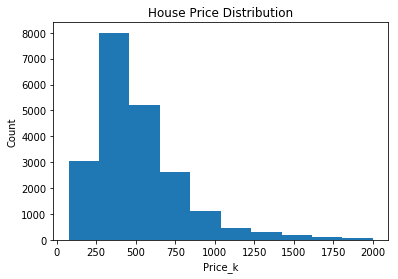

In [68]:
# Data visualization
print(house['price_k'].describe())
plt.hist(house['price_k'],bins=10)
plt.title('House Price Distribution')
plt.xlabel('Price_k')
plt.ylabel('Count')


[Text(0.5,0,'Price_k'), Text(0.5,1,'House Price Boxplot')]

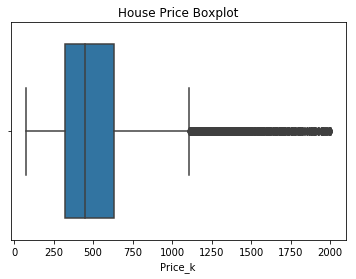

In [69]:
bx = sns.boxplot(house['price_k'])
bx.set(title = 'House Price Boxplot', xlabel = 'Price_k')

### 2. See the distribution of other house factors
* 1. Most house's square footage of home between 1,000 to 3,000 square footage. When the square footage of home become bigger and bigger, the amount of house become less and less. 
* 2. Most house's square footage of lot lower than 25,000 square footage.
* 3. Most house's square footage of basement lower than 1,500 square footage.
* 4. The house with three bedrooms is the most
* 5. The amount of house with 1 and 2.5 bathrooms is much more than other houses. It reflects the 1 and 2.5 bathroom is the favorite design in King country.
* 6. There just a little house has water in front of the house. I assume it will have a significant influence on price.
* 7. The house with grade 7 is the most.

Text(0,0.5,'Count')

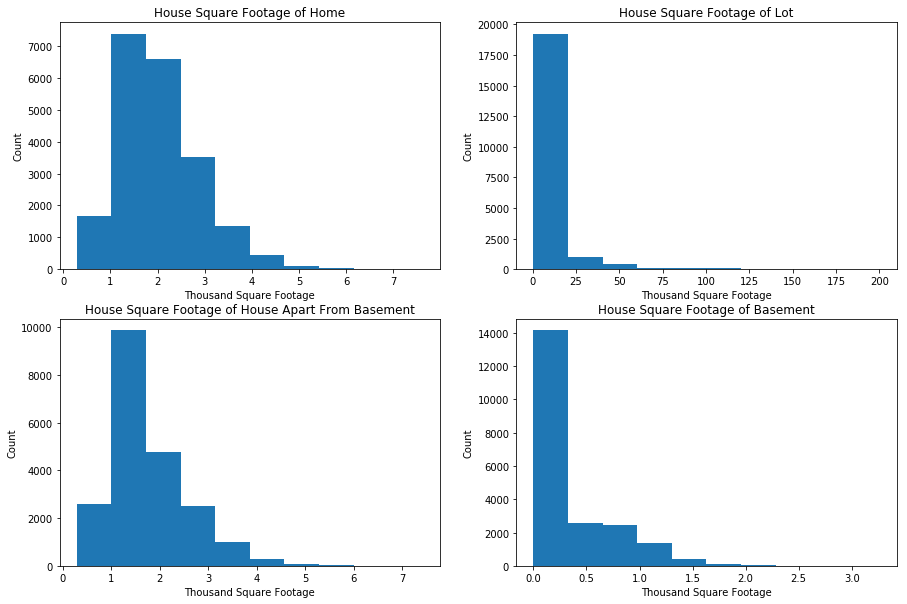

In [70]:
plt.subplots(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(house['sqft_living_k'],bins=10)
plt.title('House Square Footage of Home')
plt.xlabel('Thousand Square Footage')
plt.ylabel('Count')
plt.subplot(2,2,2)
plt.hist(house['sqft_lot_k'],bins=10)
plt.title('House Square Footage of Lot')
plt.xlabel('Thousand Square Footage')
plt.ylabel('Count')
plt.subplot(2,2,3)
plt.hist(house['sqft_above_k'],bins=10)
plt.title('House Square Footage of House Apart From Basement')
plt.xlabel('Thousand Square Footage')
plt.ylabel('Count')
plt.subplot(2,2,4)
plt.hist(house['sqft_basement_k'],bins=10)
plt.title('House Square Footage of Basement')
plt.xlabel('Thousand Square Footage')
plt.ylabel('Count')

[Text(0.5,0,'waterfront'), Text(0.5,1,'waterfront Distribution')]

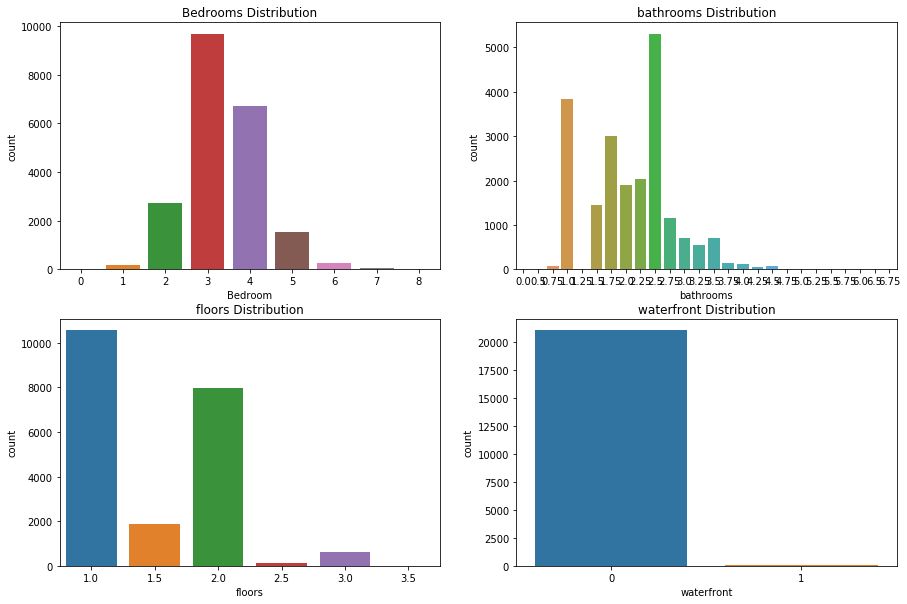

In [71]:
plt.subplots(figsize=(15,10))
plt.subplot(2,2,1)
bx1 = sns.countplot(house['bedrooms'])
bx1.set(title = 'Bedrooms Distribution', xlabel = 'Bedroom')
plt.subplot(2,2,2)
bx2 = sns.countplot(house['bathrooms'])
bx2.set(title = 'bathrooms Distribution', xlabel = 'bathrooms')
plt.subplot(2,2,3)
bx3 = sns.countplot(house['floors'])
bx3.set(title = 'floors Distribution', xlabel = 'floors')
plt.subplot(2,2,4)
bx4 = sns.countplot(house['waterfront'])
bx4.set(title = 'waterfront Distribution', xlabel = 'waterfront')

[Text(0.5,0,'grade'), Text(0.5,1,'grade')]

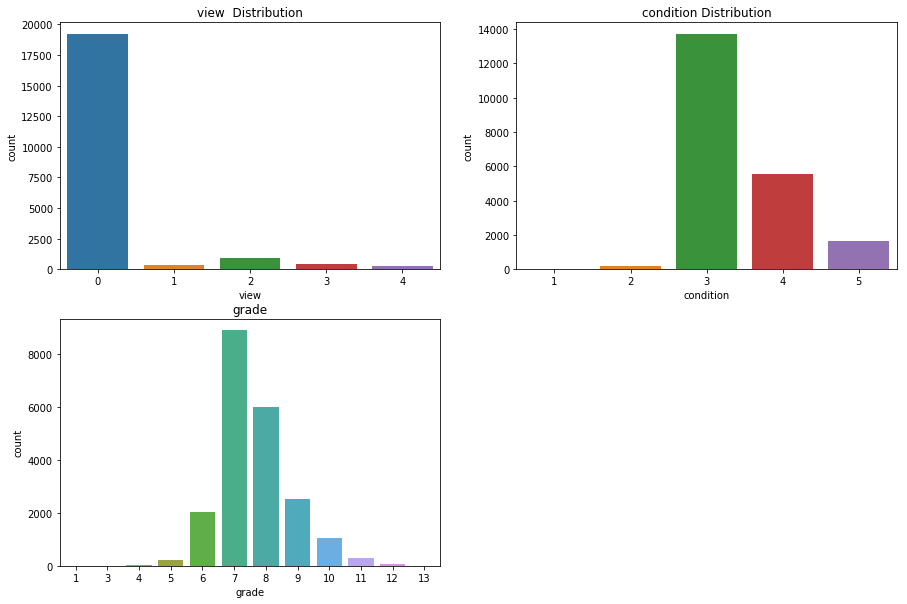

In [72]:
plt.subplots(figsize=(15,10))
plt.subplot(2,2,1)
bx5 = sns.countplot(house['view'])
bx5.set(title = 'view  Distribution', xlabel = 'view')
plt.subplot(2,2,2)
bx6 = sns.countplot(house['condition'])
bx6.set(title = 'condition Distribution', xlabel = 'condition')
plt.subplot(2,2,3)
bx7 = sns.countplot(house['grade'])
bx7.set(title = 'grade', xlabel = 'grade')

## Descritive statistics
In this part， I will create the heatmap and regression plot to see the relationship between the price and other house factors.

### Heatmap
In the heatmap, we can found the house grade, the square footage of home, the square footage of house apart from basement ,house square footage of basement and view times is high level correlated with the hoouse price. In the next step, I will focus on these factors. 

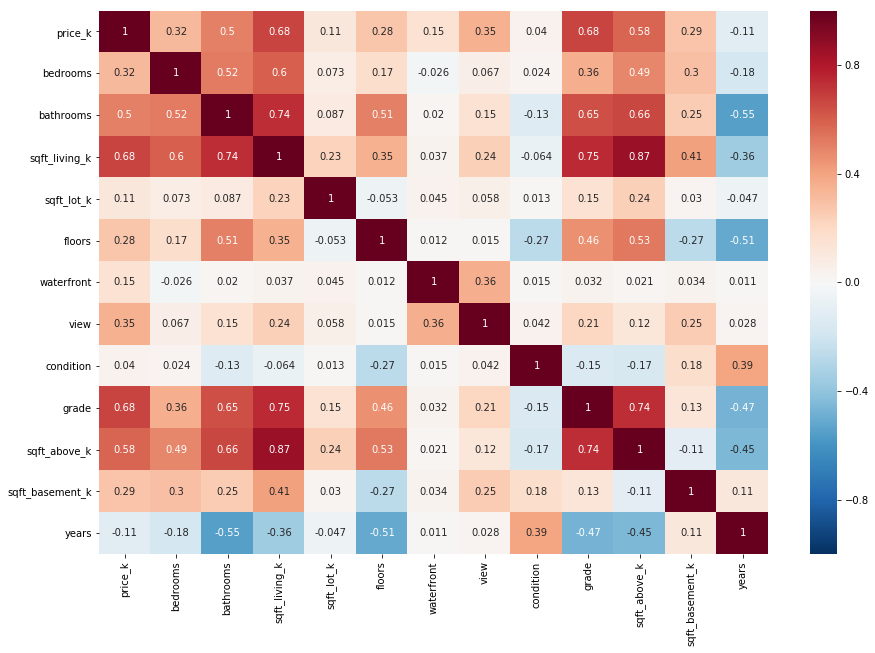

In [73]:
correlation = house.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [74]:
correlation['price_k'].sort_values(ascending=False)

price_k            1.000000
grade              0.677515
sqft_living_k      0.676316
sqft_above_k       0.579281
bathrooms          0.502245
view               0.352302
bedrooms           0.322815
sqft_basement_k    0.286214
floors             0.276559
waterfront         0.151395
sqft_lot_k         0.114781
condition          0.040037
years             -0.109480
Name: price_k, dtype: float64

### Regression Plot
From this plot, we can find the square footage of home, the square footage of house apart from the basement , house square footage of the basement and view times is positively correlated with the house price.

Text(0.5,0,'view')

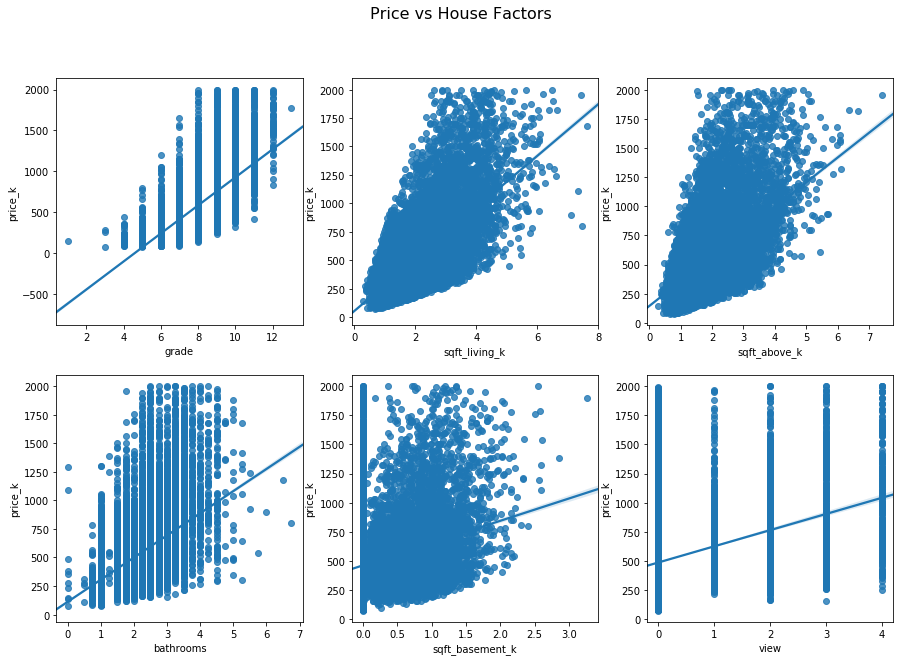

In [75]:
fig, ax = plt.subplots(figsize=(15,10)) 
fig.suptitle('Price vs House Factors', fontsize=16)

plt.subplot(2,3,1)
sns.regplot(x='grade', y="price_k", data=house) 
plt.xlabel('grade') 

plt.subplot(2,3,2)
sns.regplot(x='sqft_living_k', y="price_k", data=house) 
plt.xlabel('sqft_living_k') 

plt.subplot(2,3,3)
sns.regplot(x='sqft_above_k', y="price_k", data=house) 
plt.xlabel('sqft_above_k') 

plt.subplot(2,3,4)
sns.regplot(x='bathrooms', y="price_k", data=house) 
plt.xlabel('bathrooms') 

plt.subplot(2,3,5)
sns.regplot(x='sqft_basement_k', y="price_k", data=house) 
plt.xlabel('sqft_basement_k') 

plt.subplot(2,3,6)
sns.regplot(x='view', y="price_k", data=house) 
plt.xlabel('view') 

## Regression Model
In this part, I will use the linear regression and random forest regression to careat the model to predict the price of house and compare them.

In [76]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(house, train_size =0.8, random_state = 3)

D:\Users\morty\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Linear Regression Model
* 1. In the comparison graph of actual price with predicted price, we can say the predicted result is very close to the real price.
* 2. According to the residual distribution plot, we can see it is a normal distribution, and Mean Squared Error is 190.83.
* 3. Therefore, we can say this prediction is accurate.

In [77]:
#Regression
from sklearn import linear_model
model = linear_model.LinearRegression()
y_train,X_train = dmatrices('price_k ~ grade + sqft_living_k + sqft_above_k + bathrooms + sqft_basement_k + view', data=train_data)
model.fit(X_train, y_train)
yhat_train = model.predict(X_train)

D:\Users\morty\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


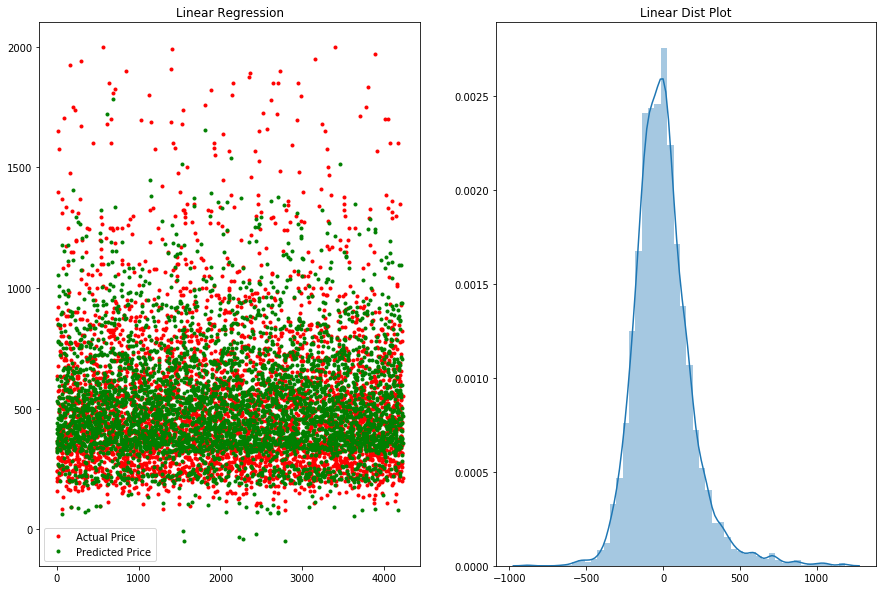

In [78]:
y_test,X_test = dmatrices('price_k ~ grade + sqft_living_k + sqft_above_k + bathrooms + sqft_basement_k + view', data=test_data)
fig, ax = plt.subplots(figsize=(15,10)) 
yhat_test = model.predict(X_test)
plt.subplot(1,2,1)
plt.title("Linear Regression")
plt.plot(y_test, 'r.')
plt.plot(yhat_test, 'g.')
plt.legend(['Actual Price', 'Predicted Price'])
plt.subplot(1,2,2)
sns.distplot(y_test - yhat_test)
plt.title("Linear Dist Plot")
plt.show()

In [79]:
from sklearn import metrics
print('Simple Model')
mean_squared_error = metrics.mean_squared_error(y_test, yhat_test)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(model.score(X_train, y_train), 3))
print('R-squared (testing) ', round(model.score(X_test, y_test), 3))
print('Intercept: ', model.intercept_)
print('Coefficient:', model.coef_)

Simple Model
Mean Squared Error (MSE)  190.83
R-squared (training)  0.559
R-squared (testing)  0.574
Intercept:  [-505.29515343]
Coefficient: [[ 0.00000000e+00  1.06727204e+02  2.43388098e+12 -2.43388098e+12
  -2.39137219e+01 -2.43388098e+12  6.74613194e+01]]


### Random Forest Regression
* 1 In the compare graph of actual price with predicted price, we can say the predict result is very close to the real price.
* 2 According to the residual distribution plot, we can see it is a normal distribution, and Mean Squared Error is 201.37.
* 3 Therefore, we can say this prediction is accurate.
* 4 Compare the Mean Squared Error and R-squared of two model, we can find the Linear regression has the better performance in this prediction.


D:\Users\morty\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
D:\Users\morty\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


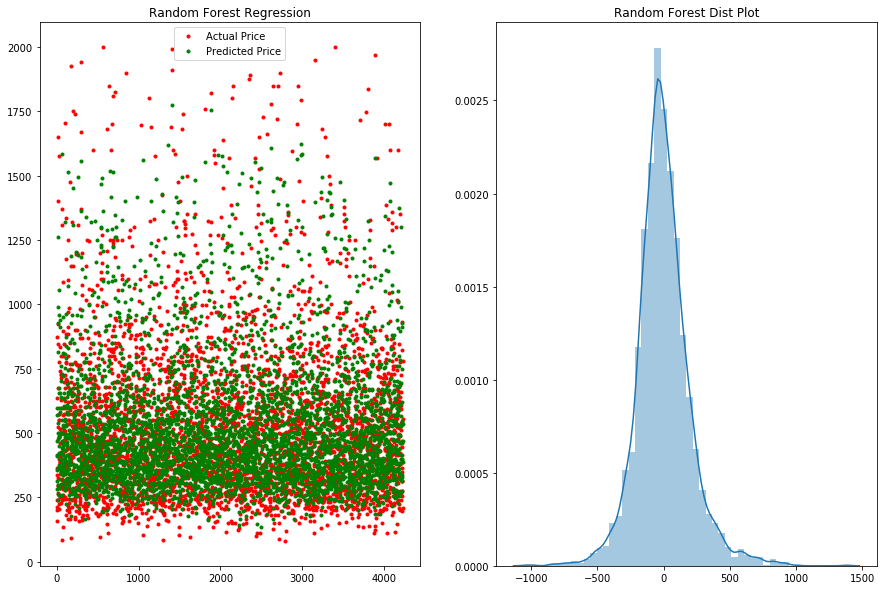

In [80]:
# Random Forest Regression
from sklearn import ensemble
model2 = sklearn.ensemble.RandomForestRegressor()
model2.fit(X_train,y_train)
yhat_test = model2.predict(X_test)
# Plot
fig, ax = plt.subplots(figsize=(15,10)) 
plt.subplot(1,2,1)
plt.title("Random Forest Regression")
plt.plot(y_test, 'r.')
plt.plot(yhat_test, 'g.')
plt.legend(['Actual Price', 'Predicted Price'])
plt.subplot(1,2,2)
sns.distplot(y_test.ravel() - yhat_test)
plt.title("Random Forest Dist Plot")
plt.show()

In [81]:
from sklearn import metrics
print('Simple Model')
mean_squared_error = metrics.mean_squared_error(y_test, yhat_test)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(model.score(X_train, y_train), 3))
print('R-squared (testing) ', round(model.score(X_test, y_test), 3))
print('Intercept: ', model.intercept_)
print('Coefficient:', model.coef_)

Simple Model
Mean Squared Error (MSE)  201.37
R-squared (training)  0.559
R-squared (testing)  0.574
Intercept:  [-505.29515343]
Coefficient: [[ 0.00000000e+00  1.06727204e+02  2.43388098e+12 -2.43388098e+12
  -2.39137219e+01 -2.43388098e+12  6.74613194e+01]]


# Conclusion

1. In King Country, most house price is between 100,000 to 750,000 dollars. The mean of the price is 519,420 dollars.


2. The house with three bedrooms is the most. And the amount of house with 1 and 2.5 bathrooms is much more than the other house. It reflects the 1 and 2.5 bathroom is the simplified design in King country.


3. The house grade, the square footage of the home, the square footage of the house apart from the basement , house square footage of basement and view times is high level positively correlated with the house price.


4. Both Linear Regression model and Random Forest Regression model can predict the house price accurately, but the Linear Regression model has a better performance.